# Image Recommendation System
Goal: Based on user preference of past images, recommend similar images <br>
Input: User liked image (s) <br>
Output: List of similar images to recommend based on their embedding distance<br>

## Part 0: Preparation

In [13]:
!pip install torch torchvision

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Part 0.1: Support Functions

In [92]:
import matplotlib.pyplot as plt
import cv2

def display_images(image_paths, row_size=5, figsize=(15, 5), titles=None, labels=None):
    """
    Displays a list of images in a row (or multiple rows if needed).

    Parameters:
        image_paths (list): List of image file paths.
        row_size (int): Number of images per row.
        figsize (tuple): Figure size for display.
        titles (list, optional): List of titles for each image.
        labels (list, optional): List of labels to display below each image.
    """
    num_images = len(image_paths)
    cols = min(row_size, num_images)  # Number of images per row
    rows = (num_images + cols - 1) // cols  # Compute number of rows

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten() if num_images > 1 else [axes]  # Handle single image case

    for i, img_path in enumerate(image_paths):
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB (OpenCV loads as BGR)

        axes[i].imshow(image)
        axes[i].axis("off")  # Hide axes

        # Set title if provided
        if titles is not None and i < len(titles):
            axes[i].set_title(titles[i], fontsize=10, fontweight="bold")

        # Set label below the image if provided
        if labels is not None and i < len(labels):
            axes[i].annotate(labels[i], xy=(0.5, -0.15), xycoords='axes fraction',
                             fontsize=9, color="gray", ha="center")
    # Hide unused subplots (in case of fewer images than row * col)
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    fig.subplots_adjust(bottom=0.15)
    plt.tight_layout()
    plt.show()


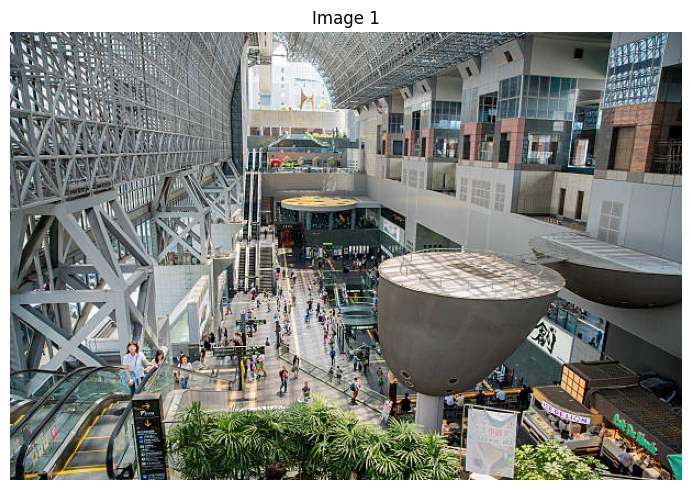

In [16]:
display_images(["/content/drive/MyDrive/ColumbiaU/Kyoto Images/Kyoto_Station_Building_3.jpg"])

## Part 1: Image to Embedding
Turn Image to embeddings/vectors so that we can represent them as numbers. With those numbers we can calculate the distances between images.

In [17]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load pre-trained ResNet18
resnet = models.resnet18(pretrained=True)

# Remove final classification layer to get feature vector output
resnet = nn.Sequential(*list(resnet.children())[:-1])  # Removes the final FC layer
resnet.eval()  # Set to evaluation mode

# Function to transform an image into a tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def extract_embedding(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = resnet(image).squeeze().numpy()  # Remove batch and flatten
    return embedding


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
philosopher_walk_embedding = extract_embedding("/content/drive/MyDrive/ColumbiaU/Kyoto Images/Philosopher's_Walk_3.jpg")
print(philosopher_walk_embedding.shape)

(512,)


### Part 2: Convert images to embeddings and save them
Open the image folder and turn each image to embedding and save them in image_embeddings

In [20]:
# prompt: mount google drive and get the images from the folder ColumbiaU/Kyoto images
import numpy as np

import os

image_folder = '/content/drive/MyDrive/ColumbiaU/Kyoto Images' # Update this path if needed
image_embeddings = {}

if os.path.exists(image_folder):
    #image_names = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image_path in image_files:
        try:
          embedding = extract_embedding(image_path)
          print(f"Embedding for {image_path}: {embedding.shape}") # Print the shape of the embedding
          image_embeddings[image_path] = embedding
        except Exception as e:
          print(f"Error processing {image_path}: {e}")
else:
    print(f"Error: Image folder '{image_folder}' not found.")

np.save("image_embeddings.npy", image_embeddings)


Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Fushimi_Inari_Taisha_Shrine_1.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Fushimi_Inari_Taisha_Shrine_2.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Fushimi_Inari_Taisha_Shrine_3.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Kinkakuji_Temple_1.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Kinkakuji_Temple_2.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Kinkakuji_Temple_3.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Kiyomizu_dera_Temple_1.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Kiyomizu_dera_Temple_2.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Arashiyama_1.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/Arashiyama_2.jpg: (512,)
Embedding for /content/drive/MyDrive/ColumbiaU/Kyoto Images/A

## Part 3: Recommendation: Finding Nearest Neighbors
Given an image embedding, we try to find the nearest neighboring image embeddings in the embedding space

In [68]:
from sklearn.neighbors import NearestNeighbors

# Load stored embeddings
image_embeddings = np.load("image_embeddings.npy", allow_pickle=True).item()
image_names = list(image_embeddings.keys())
embedding_matrix = np.array(list(image_embeddings.values()))

# Fit Nearest Neighbors Model
nn_model = NearestNeighbors(n_neighbors=5, metric='cosine')  # Use cosine similarity
nn_model.fit(embedding_matrix)

# Function to find similar images
# note that if we are giving an image already in the folder, it will also be similar to itself
def find_similar(image_path, top_k=5):
    query_embedding = extract_embedding(image_path).reshape(1, -1)
    distances, indices = nn_model.kneighbors(query_embedding, n_neighbors=top_k)

    similar_images = [image_names[i] for i in indices[0]]
    distances = distances[0].flatten().tolist()
    return similar_images, distances



In [69]:
# Example Usage
recommend_images, recommend_distances = find_similar("/content/drive/MyDrive/ColumbiaU/Kyoto Images/Kyoto_Station_Building_3.jpg", top_k=7)
print(recommend_images)
print(recommend_distances)

['/content/drive/MyDrive/ColumbiaU/Kyoto Images/Kyoto_Station_Building_3.jpg', '/content/drive/MyDrive/ColumbiaU/Kyoto Images/Eikando_Zenrinji_Temple_2.jpg', '/content/drive/MyDrive/ColumbiaU/Kyoto Images/Gion_1.jpg', '/content/drive/MyDrive/ColumbiaU/Kyoto Images/Kiyomizu_dera_Temple_1.jpg', '/content/drive/MyDrive/ColumbiaU/Kyoto Images/Sannenzaka_Ninenzaka_1.jpg', '/content/drive/MyDrive/ColumbiaU/Kyoto Images/Eikando_Zenrinji_Temple_3.jpg', '/content/drive/MyDrive/ColumbiaU/Kyoto Images/Nishiki_Market_Shopping_District_2.jpg']
[0.0, 0.2415408492088318, 0.2524523138999939, 0.2779886722564697, 0.2817615270614624, 0.28228116035461426, 0.2959953546524048]


## Part 4: Try it out & Visualize


In [97]:
def recommend_visualization(image_path, recom_cnt=5):
  print("Recommendation:")
  image_list, dists = find_similar(image_path, top_k=recom_cnt)
  titles = [os.path.basename(image_name) for image_name in image_list]
  labels = [f"Image Emb Distance: {dist:.2f}" for dist in dists]
  display_images(image_list, row_size=3, figsize=(15, 5), titles=titles, labels=labels)

Recommendation:


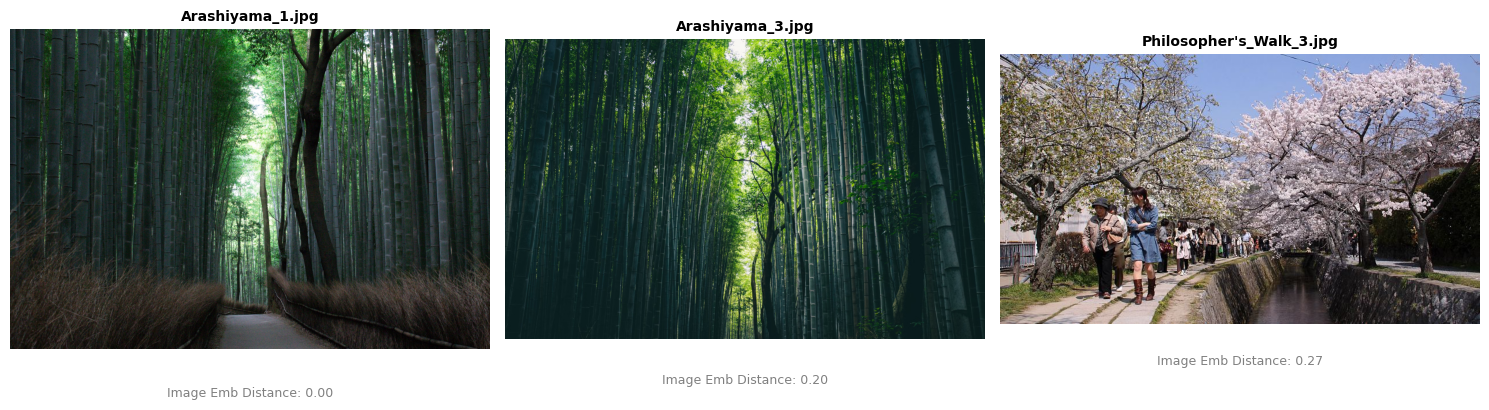

In [98]:
recommend_visualization("/content/drive/MyDrive/ColumbiaU/Kyoto Images/Arashiyama_1.jpg", 3)

Recommendation:


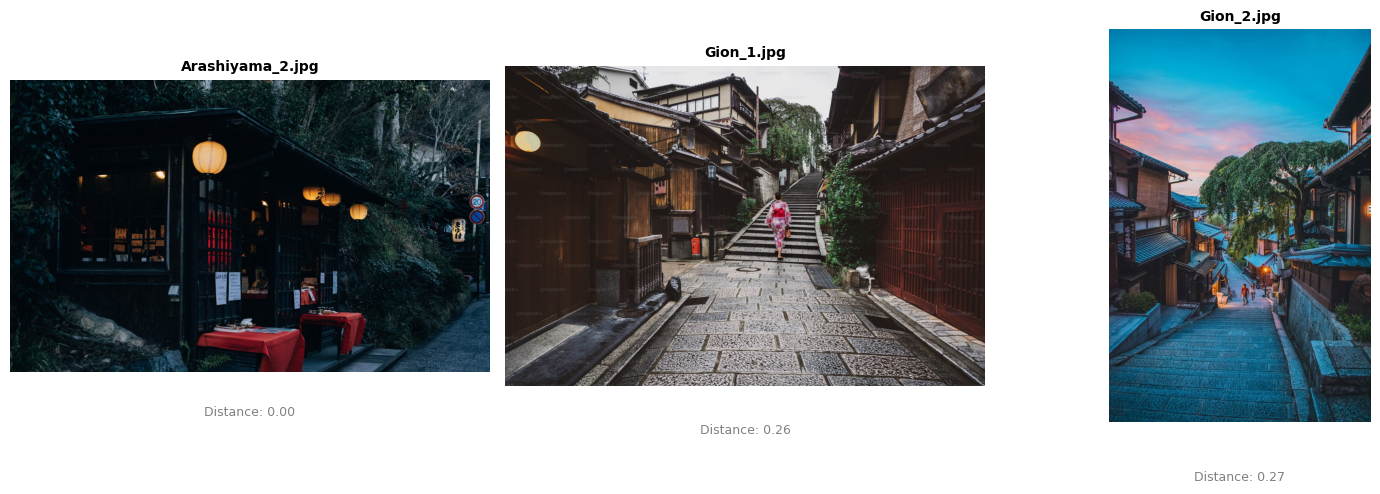

In [95]:
recommend_visualization("/content/drive/MyDrive/ColumbiaU/Kyoto Images/Arashiyama_2.jpg", 3)